In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from sklearn.datasets import fetch_openml

In [10]:
mnist = fetch_openml('mnist_784', as_frame=False)
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [11]:
mnist_X, mnist_y = mnist['data'], mnist['target']
mnist_X.shape, mnist_y.shape

((70000, 784), (70000,))

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
train_X, test_X, train_y, test_y = train_test_split(mnist_X, mnist_y, test_size=.1, random_state=42)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

knn_clf = KNeighborsClassifier()
knn_clf.fit(train_X, train_y)

KNeighborsClassifier()

In [35]:
grid_search = GridSearchCV(knn_clf, {'weights': ['uniform', 'distance'],
                                    'n_neighbors': np.arange(4,6)}, cv=3, verbose=2)
grid_search.fit(train_X, train_y)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([4, 5]),
                         'weights': ['uniform', 'distance']})

In [39]:
estimator = grid_search.best

Text(0.5, 1.0, 'Prediction: 5, Actual: 5')

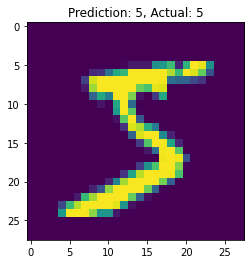

In [40]:
example = mnist_X[0]

pred, actual = estimator.predict([mnist_X[0]])[0], mnist_y[0]
plt.imshow(np.reshape(example, (28,28)))
plt.title(f'Prediction: {pred}, Actual: {actual}')